In [32]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statsmodels.sandbox.stats.multicomp import multipletests
import scipy

In [33]:
def process(categories, categories_rand, names):
    CTEs = [np.mean(c) for c in categories]
    CTEs_rand = [np.mean(c) for c in categories_rand]
    error = [np.std(c) for c in categories]
    error_rand = [np.std(c) for c in categories_rand]
    x_pos = np.arange(len(categories))*5
    return CTEs, CTEs_rand, error, error_rand, x_pos

In [34]:
# Build the plot
def build_plot(CTEs, CTEs_rand, error, error_rand, x_pos, names, pvals_corrected, title, leg_loc):
    plt.rc('font', size=20)
    fig, ax = plt.subplots()
    fig.set_size_inches(16, 8)
    plt.yticks(np.arange(0, 1, 0.1))
    ax.bar(x_pos, CTEs, yerr=error, align='center', color='blue', alpha=0.8, ecolor='black', capsize=20, width=2)
    ax.bar(x_pos+2, CTEs_rand, yerr=error_rand, align='center', color='red', alpha=0.8, ecolor='black', capsize=20, width=2)
    ax.set_ylabel('AUC')
    ax.set_xticks(x_pos+1)
    ax.set_xticklabels(names)
    ax.set_title(title)
    ax.yaxis.grid(True)
    ax.legend(['Model', 'Random'], loc=leg_loc)
    ax.patches
    i = 0
    for p, pval in zip(ax.patches, pvals_corrected):
        if pval < 0.001:
            ax.text(p.get_x() + p.get_width() / 2., p.get_height() + error[i], '***', ha='center')
            #ax.axvline(p.get_x() + p.get_width() / 2., lw=0.5)
            i += 1
            continue
        if pval < 0.01:
            ax.text(p.get_x() + p.get_width() / 2., p.get_height() + error[i], '**', ha='center')
            #ax.axvline(p.get_x() + p.get_width() / 2., lw=0.5)
            i += 1
            continue
        if pval < 0.05:
            ax.text(p.get_x() + p.get_width() / 2., p.get_height() + error[i], '*', ha='center')
            #ax.axvline(p.get_x() + p.get_width() / 2., lw=0.5)
            i += 1
            continue
        # ax.text(p.get_x() + p.get_width() / 2., p.get_height(), 'n.s.', ha='center')
        i += 1
    # Save the figure and show
    # plt.tight_layout()
    # plt.savefig('bar_plot_with_error_bars.png')
    plt.show()
    return

In [35]:
def ttest(names, categories, categories_rand):
    pvals = []
    for r, u, v in zip(names, categories, categories_rand):
        print(r,':')
        t_stat = stats.ttest_ind(u, v).statistic
        pval = stats.ttest_ind(u, v).pvalue / 2
        print('t-statistic:', t_stat, 'p-value:', pval)
        pvals.append(pval)
    # Create a list of the adjusted p-values
    reject, pvals_corrected, alphacSidak, alphacBonf = multipletests(pvals, alpha=0.05, method='bonferroni') 
    print("Bonferroni:\n")
    print("Reject:", reject)
    print("pvals corrected:", pvals_corrected)
    reject, pvals_corrected, alphacSidak, alphacBonf = multipletests(pvals, alpha=0.05, method='fdr_bh') # Benjamini/Hochberg
    print("Benjamini/Hochberg:\n")
    print("Reject:", reject)
    print("pvals corrected:", pvals_corrected)
    return pvals_corrected

In [36]:
all_ns=[]
all_aucs=[]
# CSI1
x=[973+324, 560+233, 563+300, 439+43, 210+8, 417+14, 274+10, 414+21, 654+14]
person = [0.7785934, 0.7902058, 0.8144967, 0.7993604, 0.6957953, 0.78516525, 0.81369853, 0.74844253]
face = [0.83686125, 0.8601667, 0.84533286, 0.8287057, 0.75272024, 0.88401073, 0.8057525, 0.8155809]
animal = [0.728, 0.778, 0.832, 0.724, 0.685, 0.763, 0.760, 0.822]
vehicle = [0.63666004, 0.7749062, 0.70542634, 0.6765815, 0.5861905, 0.66044986, 0.637699, 0.72237015]
outdoor = [0.6075605, 0.595832, 0.58580244, 0.61947834, 0.48774514, 0.68280077, 0.64264286, 0.64079547]
sports = [0.67907643, 0.8179509, 0.8033872, 0.7283197, 0.6249999, 0.7426069, 0.67639476, 0.7721769]
food = [0.83188015, 0.7146096, 0.78497267, 0.7598106, 0.7156991, 0.71799564, 0.777656, 0.76861054]
furniture = [0.74236554, 0.63419354, 0.67153484, 0.56088924, 0.6056729, 0.6840717, 0.6891775, 0.6668134]
tool = [0.63215446, 0.6133107, 0.6596611, 0.5776302, 0.60100305, 0.5842055, 0.58849084, 0.58240765]
for i, ca in enumerate([person, face, animal, vehicle, outdoor, sports, food, furniture, tool]):
    all_aucs.append(np.array(ca).mean(axis=0))
    all_ns.append(x[i])
# CSI2
person = [0.698701, 0.687531, 0.6658986, 0.7750946, 0.6723981, 0.6289042, 0.66271806, 0.75362545]
face = [0.7179583, 0.8204029, 0.85288906, 0.85607857, 0.8059592, 0.7545908, 0.7189794, 0.70609695]
animal = [0.7271656, 0.70883465, 0.62890434, 0.609156, 0.6617983, 0.56853884, 0.7036111, 0.711913]
vehicle = [0.53068835, 0.6348579, 0.57495767, 0.641196, 0.6298109, 0.5961196, 0.6005344, 0.48655573]
outdoor = [0.5721003, 0.6079744, 0.5837378, 0.58028287, 0.5116956, 0.5325, 0.6007536, 0.59433204]
sports = [0.7095126, 0.69620854, 0.7117042, 0.6943243, 0.7372007, 0.68981963, 0.778625, 0.6632523]
food = [0.60216343, 0.616281, 0.64354795, 0.6461636, 0.68864954, 0.6861432, 0.6974642, 0.6202813]
furniture = [0.60508454, 0.59410155, 0.68052745, 0.63709986, 0.570177, 0.60191375, 0.5407566, 0.5456711] 
tool = [0.5475229, 0.61794984, 0.5295947, 0.5524333, 0.61519575, 0.5180483, 0.51402867, 0.454988]
for i, ca in enumerate([person, face, animal, vehicle, outdoor, sports, food, furniture, tool]):
    all_aucs.append(np.array(ca).mean(axis=0))
    all_ns.append(x[i])
# CSI3
person = [0.73657066, 0.7899575, 0.83204234, 0.6706596, 0.74448764, 0.7452014, 0.67623407, 0.8098127]
face = [0.8140332, 0.804817, 0.8537963, 0.83140254, 0.8012073, 0.5226083, 0.70742464, 0.7795297]
animal = [0.6985625, 0.7225093, 0.72699285, 0.6639425, 0.73905176, 0.7592316, 0.65458024, 0.583664] 
vehicle = [0.6509918, 0.5860607, 0.6507844, 0.63255376, 0.6108348, 0.60216635, 0.59735996, 0.6277965]
outdoor = [0.5451518, 0.48978662, 0.5930882, 0.62609655, 0.5434078, 0.62872547, 0.5356879, 0.6514205]
sports = [0.7767295, 0.6188866, 0.8350569, 0.66835225, 0.7279095, 0.6431989, 0.61759377, 0.61165625]
food = [0.4997505, 0.64180386, 0.74596405, 0.6946653, 0.7082302, 0.736319, 0.51492846, 0.7245387]
furniture = [0.6133653, 0.60130477, 0.6382857, 0.65911585, 0.6193983, 0.6725537, 0.6121014, 0.56253016]
tool = [0.57276714, 0.55150145, 0.58190495, 0.49504068, 0.5078096, 0.60690856, 0.50547713, 0.53658533]
for i, ca in enumerate([person, face, animal, vehicle, outdoor, sports, food, furniture, tool]):
    all_aucs.append(np.array(ca).mean(axis=0))
    all_ns.append(x[i])
#########################
# CSI1
x = [179, 71, 71, 61]
vehicle_fine =[[0.60081846, 0.7477932, 0.6973518, 0.42261904], [0.7194853, 0.6086309, 0.6688995, 0.46810418],
               [0.585348, 0.54736847, 0.6460269, 0.5915948], [0.6461538, 0.58612436, 0.6180791, 0.5336927],
               [0.64659095, 0.6921875, 0.72737074, 0.53909206], [0.6204454, 0.72865856, 0.76388884, 0.51285714]]
for i, auc in enumerate(np.array(vehicle_fine).mean(axis=0)):
    all_aucs.append(auc)
    all_ns.append(x[i])
x=[115,73,308,87]    
animal_fine = [[0.60674155, 0.6068681, 0.59540343, 0.7047931], [0.6389237, 0.7387359, 0.59564084, 0.6005292],
               [0.6272093, 0.4663636, 0.52875245, 0.52706844], [0.74709004, 0.5845395, 0.68823534, 0.67562586],
               [0.5880952, 0.54227275, 0.56597227, 0.7138158], [0.49461725, 0.7293104, 0.55459183, 0.5340909]]
for i, auc in enumerate(np.array(animal_fine).mean(axis=0)):
    all_aucs.append(auc)
    all_ns.append(x[i])
x=[44,46,59, 43]
food_fine = [[0.6210664, 0.42001575, 0.48467433, 0.639874], [0.49886364, 0.51529986, 0.5640625, 0.68410325]]
for i, auc in enumerate(np.array(food_fine).mean(axis=0)):
    all_aucs.append(auc)
    all_ns.append(x[i])
x=[100, 66, 63,72]
tool_fine =[[0.5625, 0.4759615, 0.53394395, 0.64880383], [0.66407984, 0.6167464, 0.5350216, 0.60367066], 
            [0.6303871, 0.5895334, 0.6540948, 0.599537], [0.5279694, 0.56696427, 0.5808613, 0.66027284],
            [0.5458333, 0.5370371, 0.60051024, 0.6318525], [0.4727273, 0.5914286, 0.6458333, 0.68958336]]
for i, auc in enumerate(np.array(tool_fine).mean(axis=0)):
    all_aucs.append(auc)
    all_ns.append(x[i])

# CSI2
x = [179, 71, 71, 61]
vehicle_fine = [[0.6164835, 0.580226, 0.7110422, 0.5126748], [0.46949404, 0.48738968, 0.5062147, 0.49407327],
                [0.67399263, 0.56398815, 0.6529762, 0.5435028], [0.63257575, 0.71336204, 0.6327562, 0.49617225],
                [0.5338542, 0.28125, 0.640113, 0.5350405], [0.39400002, 0.4514286, 0.5681818, 0.3642857]]
for i, auc in enumerate(np.array(vehicle_fine).mean(axis=0)):
    all_aucs.append(auc)
    all_ns.append(x[i])
x=[115,73,308,87]    
animal_fine =[[0.52252746, 0.48650798, 0.5676337, 0.51732373], [0.59255815, 0.53155345, 0.6575251, 0.62187505],
              [0.6141975, 0.6242178, 0.62954545, 0.5576599], [0.67648464, 0.61577713, 0.67934424, 0.5954861],
              [0.6269763, 0.67087543, 0.72283673, 0.66304344], [0.41049385, 0.61096936, 0.6831276, 0.5964052]]
for i, auc in enumerate(np.array(animal_fine).mean(axis=0)):
    all_aucs.append(auc)
    all_ns.append(x[i])
x=[44,46,59, 43]
food_fine =[[0.41219094, 0.5789263, 0.54915005, 0.5670833], [0.43263647, 0.5732143, 0.52243584, 0.5752754]]
for i, auc in enumerate(np.array(food_fine).mean(axis=0)):
    all_aucs.append(auc)
    all_ns.append(x[i])
x=[100, 66, 63,72]
tool_fine = [[0.55095786, 0.46411484, 0.45524296, 0.5254167], [0.53610253, 0.43486074, 0.46228448, 0.62587416], 
             [0.53881985, 0.53636366, 0.46428573, 0.58951414], [0.5477272, 0.58978325, 0.6017858, 0.41150045], 
             [0.53162396, 0.53641975, 0.5442217, 0.60746604], [0.60931176, 0.3888889, 0.56136364, 0.5592593]]
for i, auc in enumerate(np.array(tool_fine).mean(axis=0)):
    all_aucs.append(auc)
    all_ns.append(x[i])

# CSI3
x = [179, 71, 71, 61]
vehicle_fine = [[0.47610295, 0.5425647, 0.65247846, 0.5674603], [0.630848, 0.60112995, 0.3688525, 0.48425925],
                [0.5084064, 0.5641164, 0.5813578, 0.5437063], [0.5208333, 0.6163793, 0.5128968, 0.6140734],
                [0.5025641, 0.554418, 0.45043105, 0.55510753], [0.5445344, 0.3930481, 0.50857145, 0.6774692]]
for i, auc in enumerate(np.array(vehicle_fine).mean(axis=0)):
    all_aucs.append(auc)
    all_ns.append(x[i])
x=[115,73,308,87]    
animal_fine =[[0.5533597, 0.6943054, 0.60477585, 0.6208791], [0.5077231, 0.6961806, 0.6392363, 0.73552626],
              [0.6502747, 0.6739675, 0.586928, 0.525329], [0.38710475, 0.6771207, 0.6391233, 0.68923616],
              [0.67473114, 0.69681823, 0.643771, 0.55723685], [0.5992064, 0.58898306, 0.6301021, 0.7481132]]
for i, auc in enumerate(np.array(animal_fine).mean(axis=0)):
    all_aucs.append(auc)
    all_ns.append(x[i])
x=[44,46,59, 43]
food_fine =[[0.48513988, 0.5059102, 0.5442709, 0.6263889], [0.4465909, 0.51407593, 0.56349206, 0.641583]]

for i, auc in enumerate(np.array(food_fine).mean(axis=0)):
    all_aucs.append(auc)
    all_ns.append(x[i])
x=[100, 66, 63,72]
tool_fine_rand = [[0.56366456, 0.6000874, 0.5162037, 0.5069444], [0.44444442, 0.49521533, 0.31129944, 0.5413469],
                  [0.4696174, 0.52693963, 0.4525862, 0.5021312], [0.49242425, 0.51135194, 0.5333333, 0.4875],
                  [0.5198276, 0.55825794, 0.4510613, 0.5015789], [0.5242915, 0.6927083, 0.41145828, 0.5362319]]
for i, auc in enumerate(np.array(tool_fine).mean(axis=0)):
    all_aucs.append(auc)
    all_ns.append(x[i])
print(len(all_aucs))
print(len(all_ns))

75
75


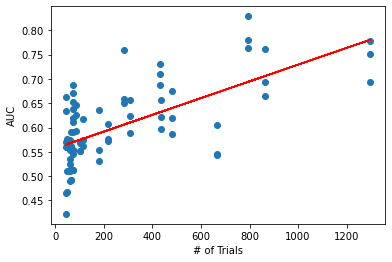

In [37]:
plt.xlabel("# of Trials")
plt.ylabel("AUC")
plt.scatter(all_ns, all_aucs, marker='o')
y = np.array(all_aucs)
x = np.array(all_ns)
x = x.reshape(x.shape[0], 1)
X = np.append(x, np.ones((x.shape[0], 1)), axis=1)
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
y_line = X.dot(theta)
plt.plot(x, y_line, 'r')
plt.show()


In [38]:
print("correlation coefficient:", scipy.stats.pearsonr(all_ns, all_aucs)[0])

correlation coefficient: 0.6580893534890986


In [31]:
print("p-value:", scipy.stats.pearsonr(all_ns, all_aucs)[1])

p-value: 1.9822999299420758e-08
